# Overview

We're now switching focus away from the Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on Reddit, because subbmisions and comments often contain text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> **_Video Lecture_**. [Intro to Natural Language processing](https://www.youtube.com/watch?v=Ph0EHmFT3n4). Today is all about working with NLTK, so not much lecturing - we will start with a perspective on text analysis by Sune (you will hear him talking about Wikipedia data here and there. Everything he sais applies to Reddit data as well!)

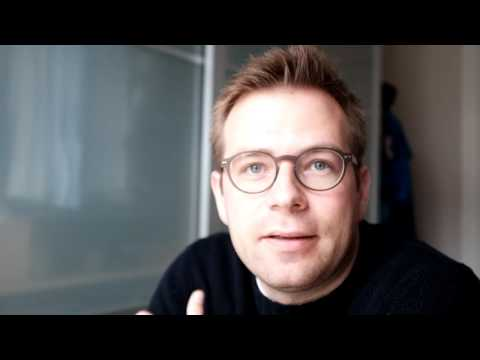

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)

# Installing and the basics

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1.1, 1.2, 1.3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open IPython Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a `notebook`. 
 

### NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks: In the iPython notebook, run the code 

     import nltk
     nltk.download()

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

In [6]:
import nltk

> *Exercises: NLPP Chapter 1 (the stuff that might be due in an upcoming assignment).
> 
> The following exercises from Chapter 1 are what might be due in an assignment later on.
>
> * Try out the `concordance` method, using another text and a word of your own choosing.
> * Also try out the `similar` and `common_context` methods for a few of your own examples.
> * Create your own version of a dispersion plot ("your own version" means another text and different word).
> * Explain in your own words what aspect of language _lexical diversity_ describes. 



In [5]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [16]:
text8.concordance('heavy')

no matches


In [18]:
text2.similar('a'), text3.similar('a')

the her his so this that as no your one my every some any too their
very with another all
the his this my that thy to every their man heaven earth darkness of
deep waters said day night evening


(None, None)

In [19]:
text3.common_contexts(['a','the'])

for_burnt and_young by_well of_field of_tree and_tree forth_dove
of_flood of_covenant and_tower unto_land in_land by_fountain in_cave
of_well of_month with_good took_stone prison_place out_man


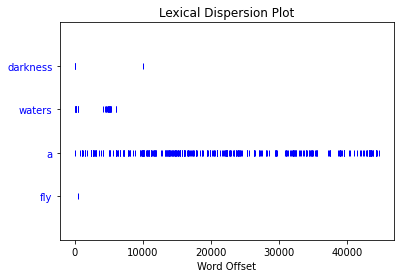

In [20]:
text3.dispersion_plot(['darkness','waters','a','fly'])

Lexical diversity is defined as the amount of unique words in a text divived by the total number of words in the text. Thus it tells us something about how many words we have to read before we expect to have encountered a unique word on average.

In [2]:
def lexical_diversity(text):
    return len(set(text))/len(text)

> * Create frequency distributions for `text2`, including the cumulative frequency plot for the 75 most common words.

In [25]:
word_counts = dict(zip(set(text3),[text3.count(word) for word in set(text3)]))

In [50]:
import numpy as np
sort_idx = np.argsort(list(word_counts.values()))
words = np.array(list(set(text3)))
N = 75
N_most_frequent_words = words[sort_idx[len(sort_idx)-N:]]
frequencies = [word_counts[word]/len(text3) for word in N_most_frequent_words]

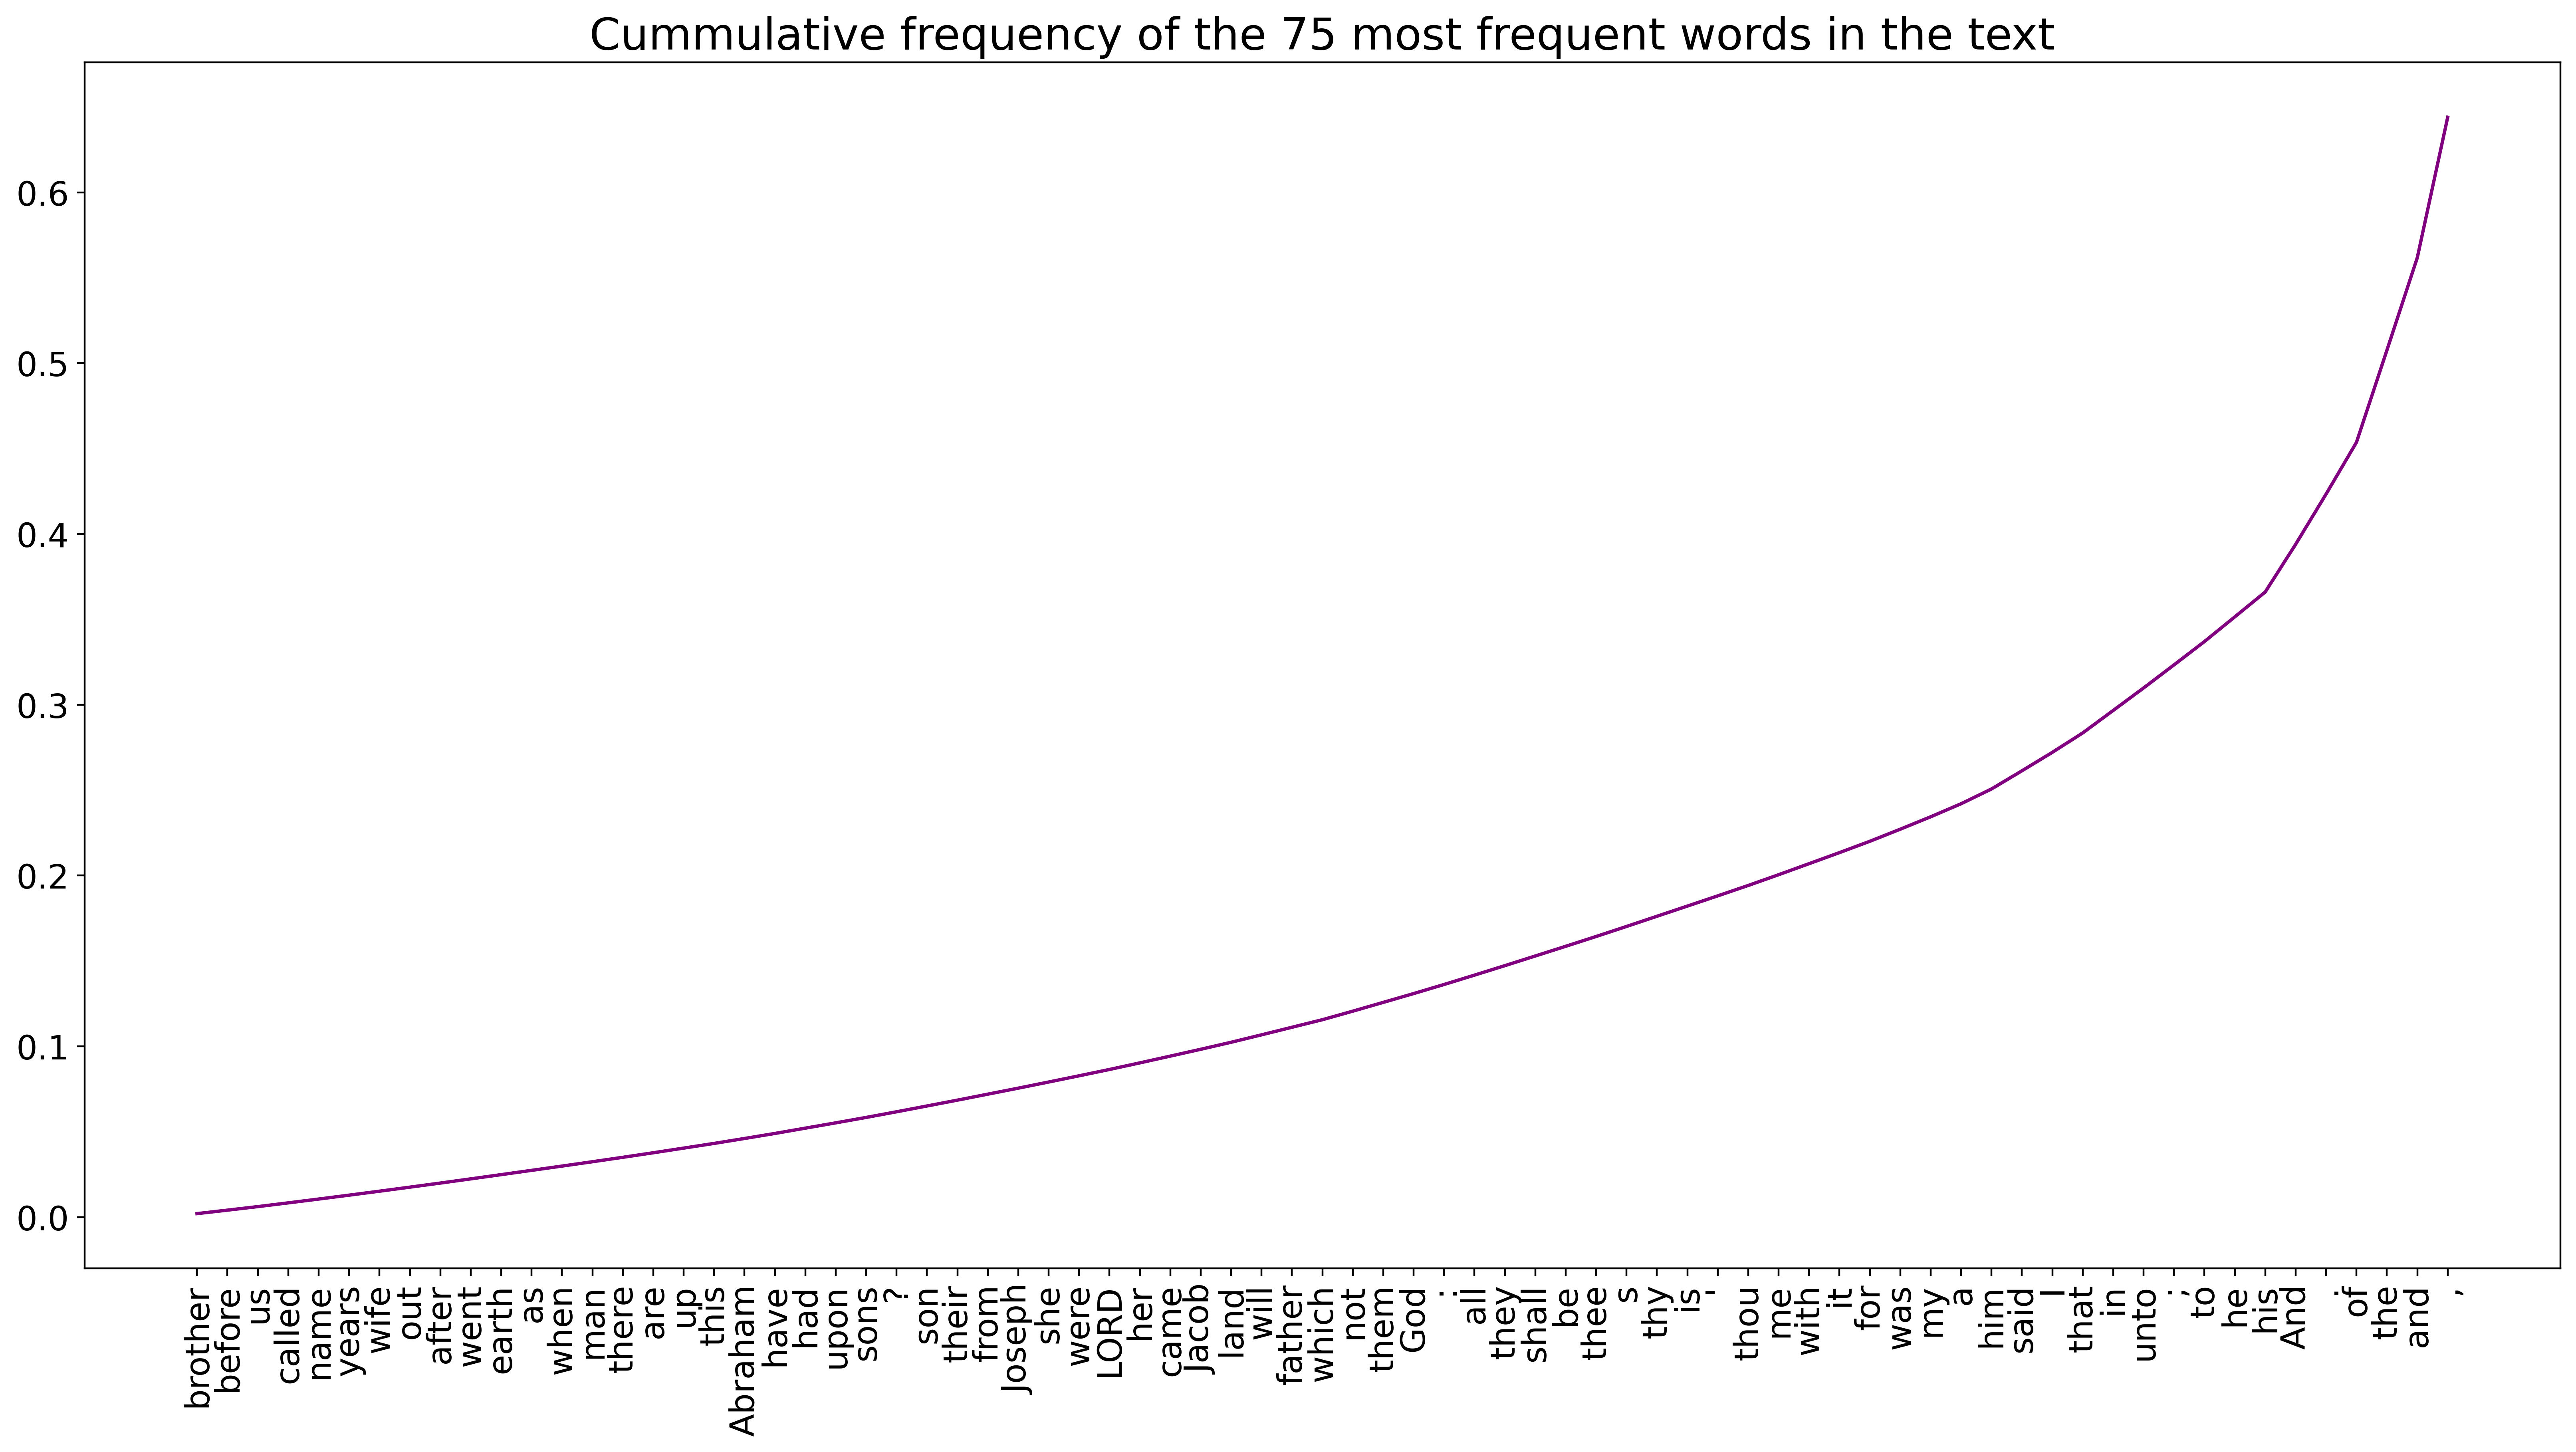

In [74]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(20,10),dpi=400)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
ax.plot(N_most_frequent_words,np.cumsum(frequencies),'-',color='purple')
plt.title(label=f'Cummulative frequency of the {N} most frequent words in the text', fontdict={'fontsize': 20});

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.





A bigram is a pair of two words that appear in sequence. It relates to collocation in the sense that a collocation is a group of words which often go together or are likely to occur together, so by checking for the most frequent bigrams in a text we can find the collocations.

> * Work through ex 2-12 in NLPP's section 1.8\. 

In [3]:
12/(4 + 1)

2.4

In [1]:
26**100

3142930641582938830174357788501626427282669988762475256374173175398995908420104023465432599069702289330964075081611719197835869803511992549376

In [3]:
phrase1 = "hi hello sdjfkl"
phrase2 = "no okay then"
len(phrase1) + len(phrase2) - (len(phrase1 + phrase2))

0

> * Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8\. 

In [14]:
# 15

words_b = [w.lower() for w in set(text5) if w.lower().startswith('b')]
words_b.sort()
print(words_b)

['b', 'b', 'b-day', 'b/c', 'b4', 'baaaaalllllllliiiiiiinnnnnnnnnnn', 'babay', 'babble', 'babblein', 'babe', 'babes', 'babi', 'babies', 'babiess', 'baby', 'babycakeses', 'bachelorette', 'back', 'back', 'backatchya', 'backfrontsidewaysandallaroundtheworld', 'backroom', 'backup', 'bacl', 'bad', 'bag', 'bagel', 'bagels', 'bahahahaa', 'bak', 'baked', 'balad', 'balance', 'balck', 'ball', 'ballin', 'balls', 'ban', 'band', 'bandito', 'bandsaw', 'banjoes', 'banned', 'baord', 'bar', 'barbie', 'barbieee', 'bare', 'barely', 'bares', 'barfights', 'barks', 'barn', 'barometer', 'barrel', 'base', 'bases', 'basically', 'basket', 'battery', 'bay', 'bbbbbyyyyyyyeeeeeeeee', 'bbiam', 'bbl', 'bbs', 'bc', 'be', 'be', 'beach', 'beach', 'beachhhh', 'beam', 'beams', 'beanbag', 'beans', 'bear', 'bears', 'beat', 'beaten', 'beatles', 'beats', 'beattles', 'beautiful', 'because', 'because', 'beckley', 'become', 'bed', 'bedford', 'bedroom', 'beeeeehave', 'beeehave', 'been', 'been', 'beer', 'before', 'beg', 'begin', '

In [15]:
# 16
def list_range(s, e, step=1):
    return list(range(s,e,step))

print(list_range(10,20))
print(list_range(10,20,2))
print(list_range(20,10,-2))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[10, 12, 14, 16, 18]
[20, 18, 16, 14, 12]


In [20]:
# 18

def vocabulary(text):
    return set(w.lower() for w in text if w.isalpha())

sents = [sent1,sent2,sent3,sent4,sent5,sent6,sent7,sent8]

for sent in sents:
    print(vocabulary(sent))

{'me', 'call', 'ishmael'}
{'long', 'family', 'sussex', 'been', 'had', 'settled', 'in', 'the', 'of', 'dashwood'}
{'created', 'heaven', 'in', 'the', 'earth', 'god', 'and', 'beginning'}
{'fellow', 'house', 'representatives', 'senate', 'the', 'of', 'citizens', 'and'}
{'have', 'pming', 'with', 'i', 'me', 'people', 'a', 'join', 'lol', 'to', 'problem'}
{'clop', 'scene', 'arthur', 'wind', 'king', 'there', 'whoa'}
{'as', 'vinken', 'board', 'years', 'pierre', 'will', 'the', 'join', 'a', 'director', 'nonexecutive', 'old'}
{'single', 'male', 'sexy', 'encounters', 'attrac', 'lady', 'older', 'seeks', 'for', 'discreet'}


In [22]:
# 19

s  = sorted(set(w.lower() for w in text1))
sp = sorted(w.lower() for w in set(text1))
assert len(sp) >= len(s)

# contains duplicates where as s does not.


In [41]:
# 22

def words(text):
    return [w.lower() for w in text if w.isalpha()]

vocab_5 = vocabulary(text5)
four_c_w = [w for w in vocab_5 if len(w) == 4]
text5_lower = [w.lower() for w in text5]
word_counts = dict(zip(set(text5_lower),[text5_lower.count(word) for word in four_c_w]))


In [56]:
fd5 = FreqDist(text5_lower)
freq_4 = [(w,fd5[w]/len(text5_lower)) for w in set(four_c_w)]

In [57]:
freq_4.sort(reverse=True,key=lambda x: x[1])

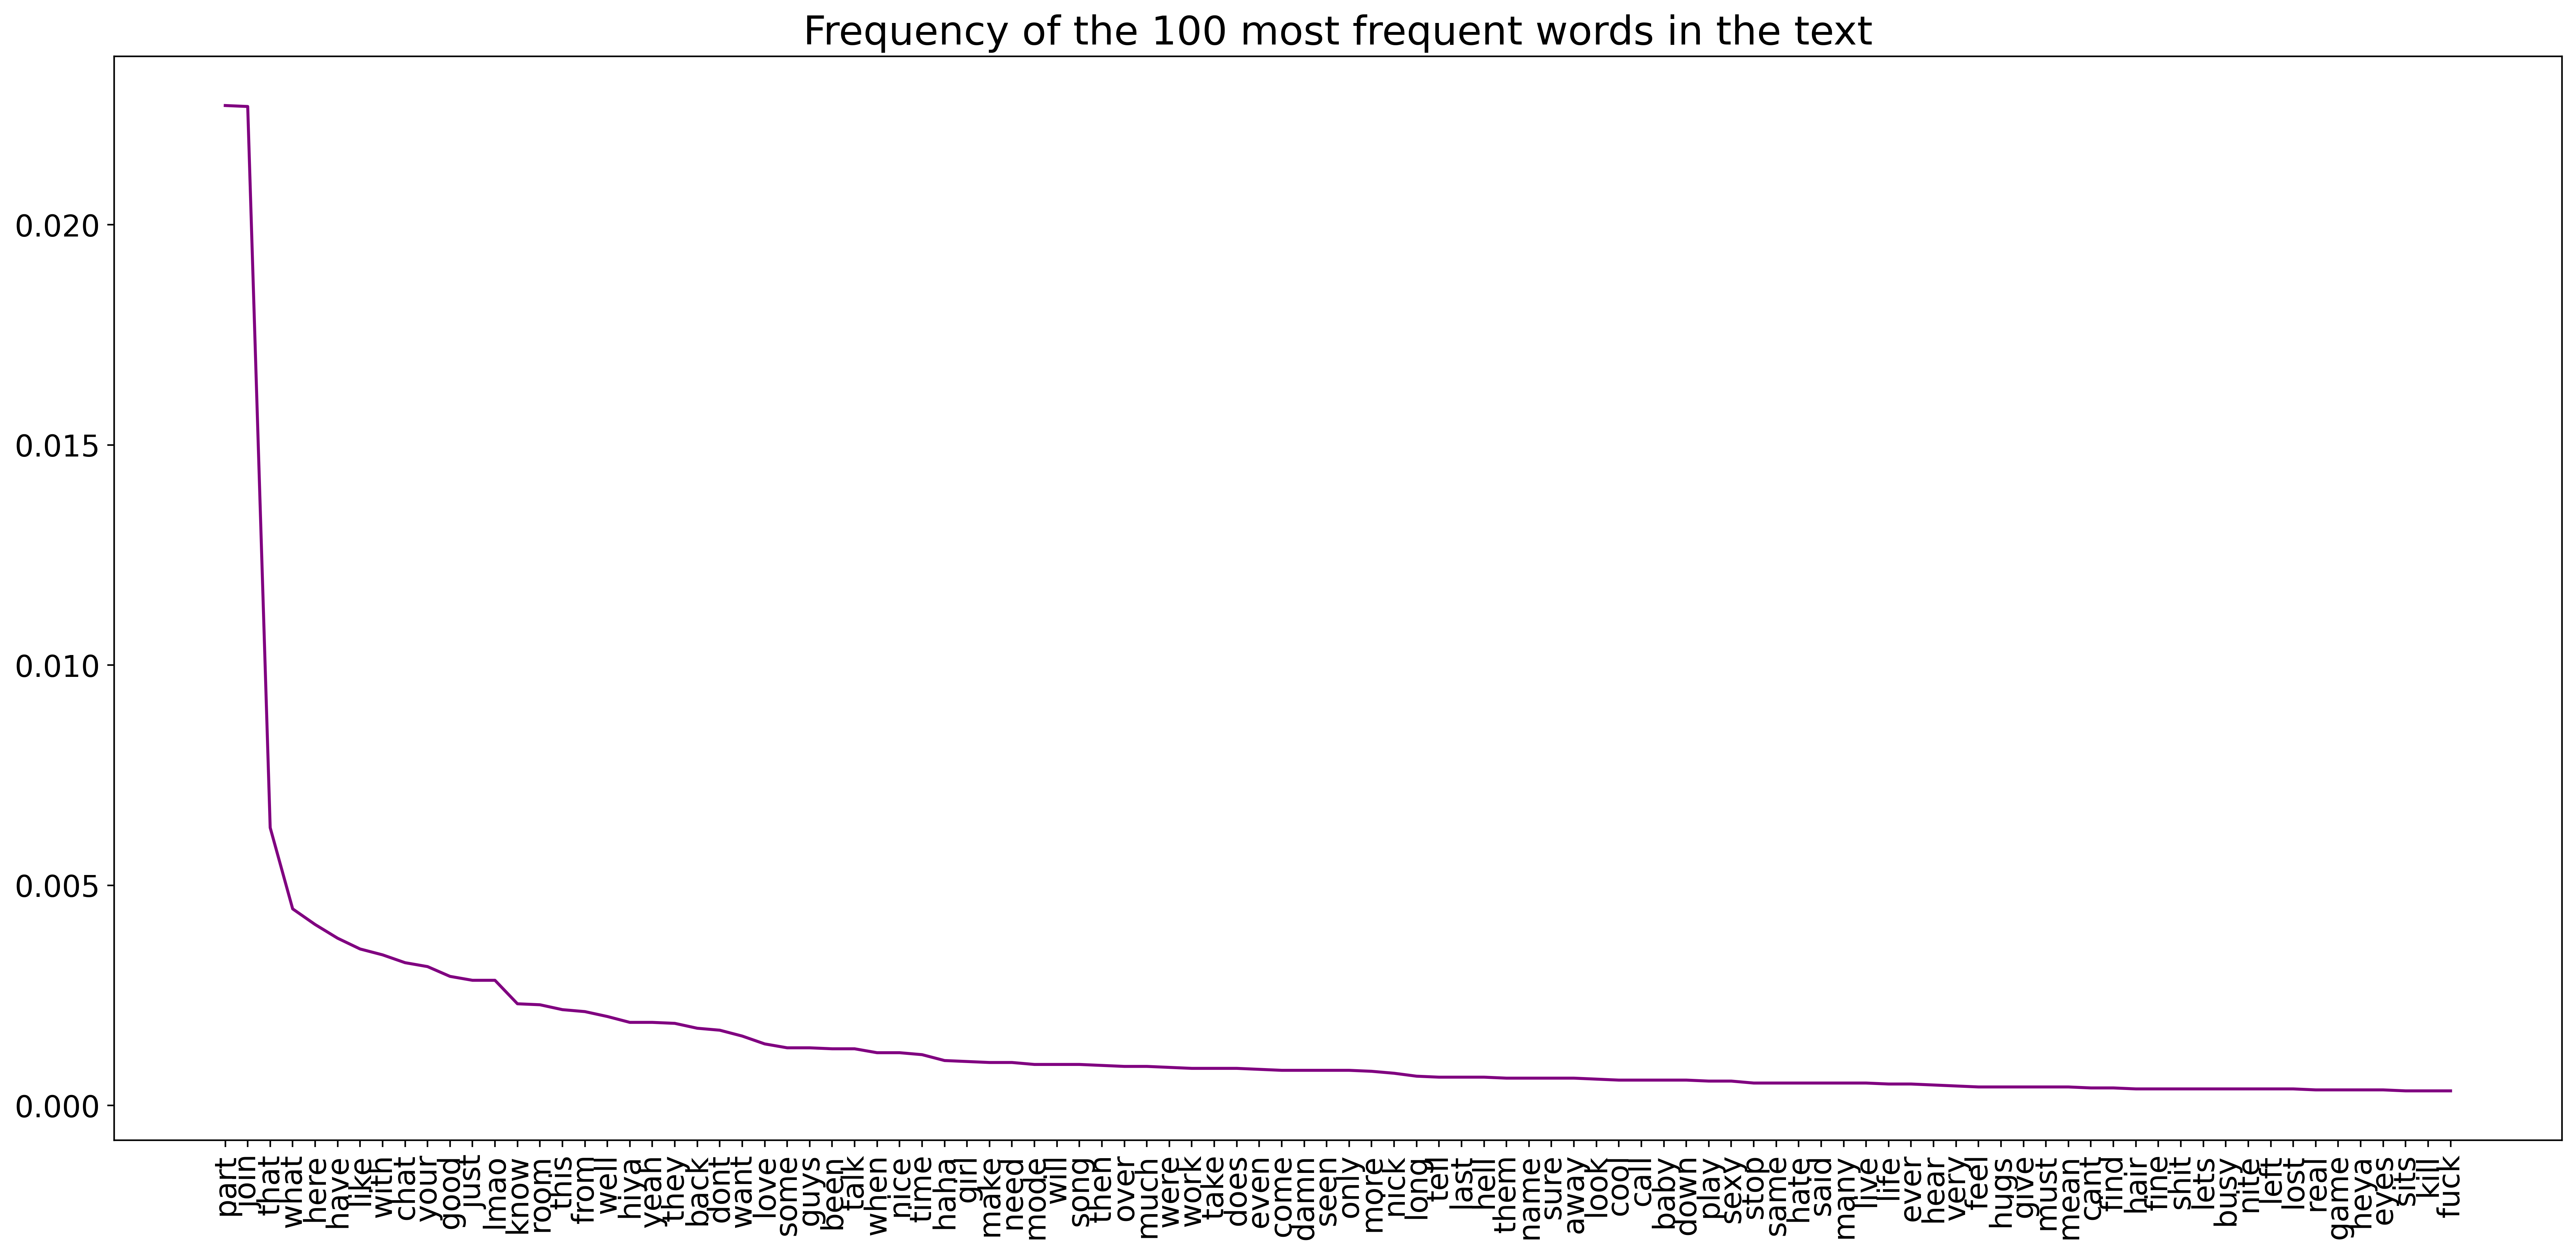

In [68]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(22,10),dpi=400)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
N = 100
ax.plot(*zip(*freq_4[:N]),'-',color='purple')
plt.title(label=f'Frequency of the {N} most frequent words in the text', fontdict={'fontsize': 20});

In [72]:
# 23
for w in set(text6):
    if w[0].isupper():
        print(w)

How
Loimbard
Court
Thou
Nay
Peril
N
Quickly
ANIMATOR
NARRATOR
Actually
Quite
Mother
WITCH
ARTHUR
Twenty
Y
Who
Hmm
GUESTS
BROTHER
Antioch
PIGLET
Your
CRASH
One
Blue
Old
GOD
Dramatically
Angnor
Come
Wait
Eh
INSPECTOR
True
Ere
Tall
Bloody
Quick
B
Tale
Iesu
Course
Uh
PRINCE
Could
None
Knights
Aramaic
Winter
Doctor
Like
MINSTREL
Hoo
Mercea
RIGHT
S
Churches
BORS
Sir
Where
First
Chop
Behold
Hm
Walk
Heh
Uther
Umhm
Beast
HEADS
THE
But
Back
Away
Don
Patsy
Erm
Oh
ENCHANTER
Table
Hang
PRISONER
Guy
LEFT
And
Launcelot
Aauuggghhh
Haw
Does
Dragon
Splendid
Not
African
ROGER
Supreme
W
Victory
KNIGHT
Do
Arthur
Even
SUN
Dennis
Together
Piglet
All
Bon
Anybody
Holy
Prepare
Aaaaaah
Hill
Pin
Uhh
Pie
OLD
Clear
Uuh
Alice
Let
Quoi
Oui
HEAD
Ho
Steady
Thpppt
Exactly
Fiends
Battle
LOVELY
Forward
U
Ha
Yapping
Picture
Be
Welcome
Bring
Of
Surely
Bones
STUNNER
DEAD
Nador
Aaauugh
Hiyya
BLACK
Didn
OF
Good
Ninepence
Robin
Hand
Bristol
Gable
Wood
Concorde
SIR
France
Burn
Very
Augh
Erbert
Say
Midget
Did
Yeaah
Now
Hiyaah
Hur

In [77]:
# 26

text = text1
total_word_len = sum(len(w) for w in text)
print(f"Average word length of {text}: {total_word_len/len(text1)} letters")

# 27

def vocab_size(text):
    return len(vocabulary(text))

# 28

def percent(word, text):
    return text.count(word)/len(text)


Average word length of <Text: Moby Dick by Herman Melville 1851>: 3.830411128023649 letters


# Working with NLTK and other types of text

Chapter 2 in NLPP1e is all about getting access to nicely curated texts that you can find built into NLTK. 
> 
> Reading: NLPP Chapter 2 sections 1 to 4\.

> *Exercises*: NLPP Chapter 2\.
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP1e, chapter 2, section 8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> 

### 4
Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [98]:
import nltk
from nltk.corpus import *


def words(text):
    return [w.lower() for w in text if w.isalpha()]

w = state_union.words()
w = words(list(w))
words_ = ['men', 'women', 'people']
print({word: w.count(word) for word in words_})

{'men': 232, 'women': 145, 'people': 1313}


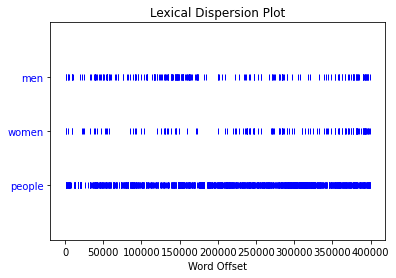

In [105]:
nltk.draw.dispersion_plot(state_union.words(),words_)

### 8
Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

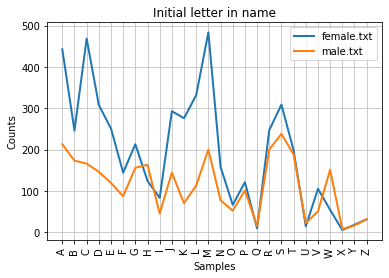

<AxesSubplot:title={'center':'Initial letter in name'}, xlabel='Samples', ylabel='Counts'>

In [111]:
names = nltk.corpus.names
male_names = names.words('male.txt')
female_names = names.words('female.txt')
cfd = nltk.ConditionalFreqDist((fileid,name[0]) for fileid in names.fileids()
                              for name in names.words(fileid))


cfd.plot(title='Initial letter in name')

### 11
Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [112]:
from nltk.corpus import brown
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd = nltk.ConditionalFreqDist(
           (genre, word)
           for genre in brown.categories()
           for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [131]:
preposistions = ["about","above","across","after","against","along","among","around", "at","before","behind","between", "beyond","but",		"by",		"concerning", "despite",		"down",		"during",		"except", "following",		"for",		"from",		"in", "including",		"into",		"like",		"near", "of",		"off",		"on",		"onto", "out",		"over",		"past",		"plus", "since",		"throughout",		"to",		"towards", "under",		"until",		"up",		"upon", "up", "to",		"with",		"within",		"without"]

cfd.tabulate(conditions=genres, samples=preposistions[:10])
cfd.tabulate(conditions=genres, samples=preposistions[10:19])
cfd.tabulate(conditions=genres, samples=preposistions[19:28])
cfd.tabulate(conditions=genres, samples=preposistions[28:37])
cfd.tabulate(conditions=genres, samples=preposistions[37:45])
cfd.tabulate(conditions=genres, samples=preposistions[45:])

                  about   above  across   after against   along   among  around      at  before 
           news     136      15      16     127      78      34      24      30     598      86 
       religion      64       2       4      17      28       5      24       5     114      26 
        hobbies      98      23      17      49      23      25       9      41     328      63 
science_fiction      18       4       2      11       4       2      11       8      51      12 
        romance     164      17      19      58      42      33      11      68     402      88 
          humor      36       2       3      19      11       5       7      15     100      10 
                    behind    between     beyond        but         by concerning    despite       down     during 
           news          9         47          9        174        497          0         11         50         55 
       religion          7         31         13        132        186          5        

### 15
Write a program to find all words that occur at least three times in the Brown Corpus.

### 16
 Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

### 17
Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

In [134]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 18
Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.